In [ ]:
import numpy as np 

In [ ]:
x=2*np.random.rand(100,1)
y=3+3*np.random.rand(100,1)

In [ ]:
X_b = np.c_[np.ones((100, 1)), x]

In [ ]:
x_b=np.stack((np.ones((100,1)).flatten().reshape(x.shape),x),axis=1).flatten().reshape(100,2)

In [ ]:
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [ ]:
theta_best

array([[4.33991732],
       [0.09608844]])

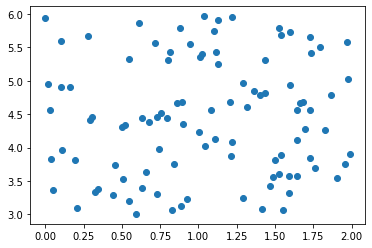

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x,y)

In [ ]:
x_new=np.array([[0],[2]])
x_new_b=np.stack((np.ones((2,1)),x_new),axis=1).flatten().reshape(2,2)

In [ ]:
y_pred=x_new_b.dot(theta_best)

In [ ]:
y_pred

array([[4.33991732],
       [4.5320942 ]])

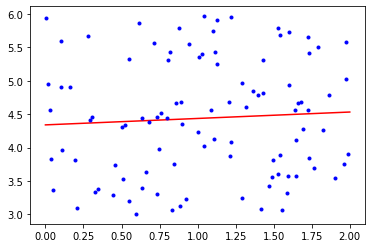

In [ ]:
plt.plot(x_new, y_pred, "r-")
plt.plot(x, y, "b.")

# Performing Linera Regression on the same set

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_clf=LinearRegression()
lin_clf.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_clf.predict(x_new)

array([[4.33991732],
       [4.5320942 ]])

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond=1e-6)

In [ ]:
theta_best_svd

array([[4.33991732],
       [0.09608844]])

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[4.33991732],
       [0.09608844]])

# Gradient Descent 

In [ ]:
eta=0.1
n_iterations=1000
m=100

In [ ]:
theta=np.random.randn(2,1)

In [ ]:
for iteration in range(n_iterations):
  gradients=2/m*x_b.T.dot(x_b.dot(theta)-y)
  theta=theta-eta*gradients

In [ ]:
theta

array([[4.33991732],
       [0.09608844]])